In [65]:
from diffractsim import ApertureFromFunction, ApertureFromImage, MonochromaticField, mm, cm, nm, um
from diffractsim import Lens, GaussianBeam
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import map_coordinates
from skimage import io
from skimage.transform import resize
import types
import matplotlib as mpl
import imageio

mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'Times New Roman'
mpl.rcParams['font.size'] = 12
#mpl.rcParams['font.weight'] = 'bold'
#mpl.rcParams['font.style'] = 'italic'  # Set this to 'italic'
mpl.rcParams['figure.dpi'] = 300  # highres display



In [66]:
def find_index(array, value):
    # Calculate the absolute differences between each element and the target value
    array = np.abs(array)
    absolute_diff = np.abs(array - value)
    # Find the index of the minimum absolute difference
    index = np.argmin(absolute_diff)
    return index

def intensity_linecut(intensity):
    I_line = intensity[(intensity.shape[1])//2,:]
    I_line /= max(I_line)
    plt.plot(field.xx[0,:]/mm,I_line,'r-',lw=1)
    plt.title("Intenasity variation across screen centre")
    plt.xlabel("x (mm)")
    plt.ylabel(r"I$_{norm}$   (Arb unit)")
    plt.show()
    pass

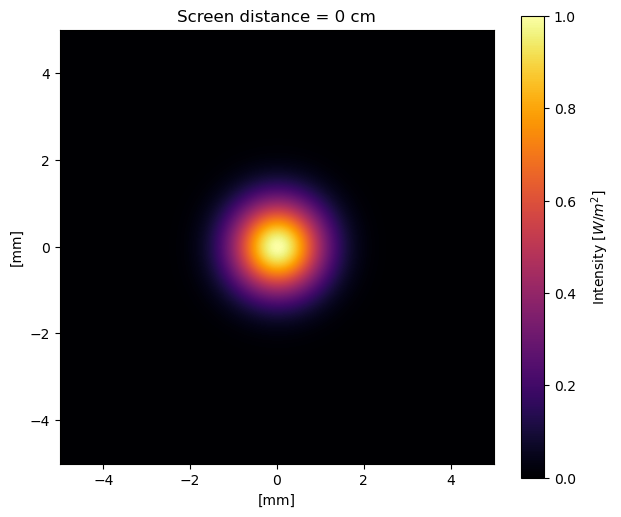

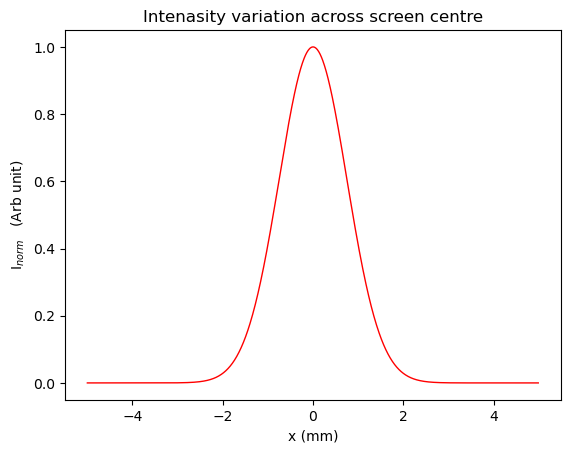

In [ ]:
# Create a monochromatic field with a specific wavelength
wavelength = 800 * nm  # Wavelength of 500 nm
field = MonochromaticField(
    wavelength=wavelength,
    extent_x=10*mm,
    extent_y=10*mm,
    Nx=1024,
    Ny=1024
)

# Define the initial beam waist
beam_waist = 1.5 * mm

## Target P0sition
x_shift = -150
y_shift = -200

savegif=False


field.add(GaussianBeam(w0=beam_waist))

intensity = field.get_intensity()
intensity /= np.max(intensity)
field.plot_intensity(intensity)
intensity_linecut(intensity)

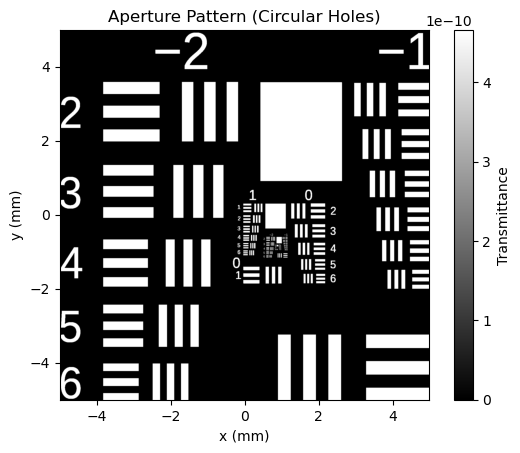

In [68]:
USAF = io.imread("D:\\Codes\\lab codes\\Diffraction pattern\\USAF-1951.png")
USAF = USAF[:,:,1]


USAF = np.array(USAF)
USAF = (USAF>0.8)
USAF = 1-(1-USAF)
USAF = USAF[50:1610,55:1700]

USAF = resize(USAF, (2000,2000), anti_aliasing=True)

a = 130
usaf = resize(USAF,(a,a),anti_aliasing=True)
USAF[1100:1100+a,1100:1100+a] = usaf

def f(x, y, wavelength):
    global USAF
    height, width = USAF.shape[:2]
    x_img = ((x - x.min()) / (x.max() - x.min()) * (width - 1)).astype(int)
    y_img = ((y - y.min()) / (y.max() - y.min()) * (height - 1)).astype(int)
    return USAF[y_img, x_img]

# Create the aperture pattern
x = field.xx
y = field.yy

# Plot the aperture pattern
plt.figure()
plt.imshow(USAF, extent=(x.min()/mm, x.max()/mm, y.min()/mm, y.max()/mm), cmap='gray')
plt.title('Aperture Pattern (Circular Holes)')
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
plt.colorbar(label='Transmittance')
plt.show()

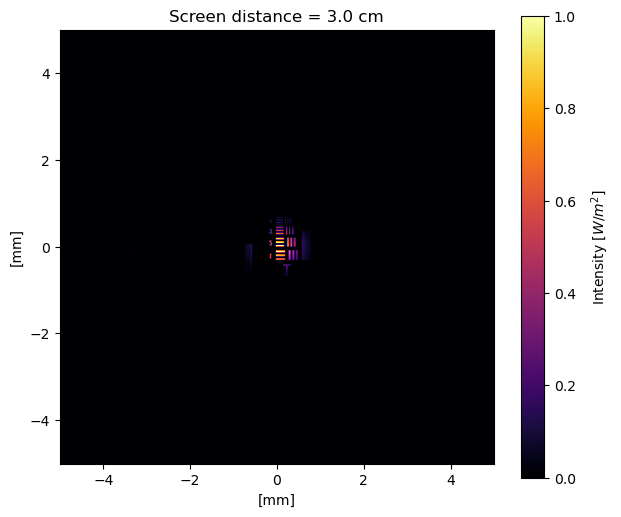

In [69]:
# Define the first lens
focal_length_1 = 50 * mm  # Focal length of the first lens
lens1 = Lens(f=focal_length_1, radius= 10*beam_waist)
field.add(lens1)
field.propagate(30 * mm)

# Create an aperture from the function
aperture = ApertureFromFunction(f)
# Add the aperture to the field
field.add(aperture)


intensity = field.get_intensity()
intensity /= np.max(intensity)
field.plot_intensity(intensity)

In [70]:
field.propagate(100 * mm)
# Define the first lens
focal_length_2 = 70 * mm  # Focal length of the first lens
lens2 = Lens(f=focal_length_2, radius= 10*beam_waist)
field.add(lens2)

field.propagate(200*mm)

C:\Users\mrsag\AppData\Local\Temp\ipykernel_2672\3236126755.py:14: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  gif_image.append(imageio.imread(filename))


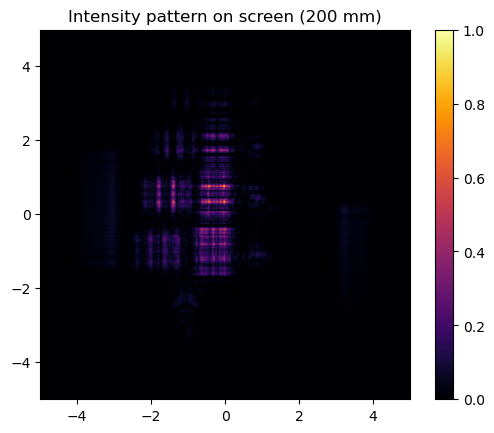

Progres: 0.0 %


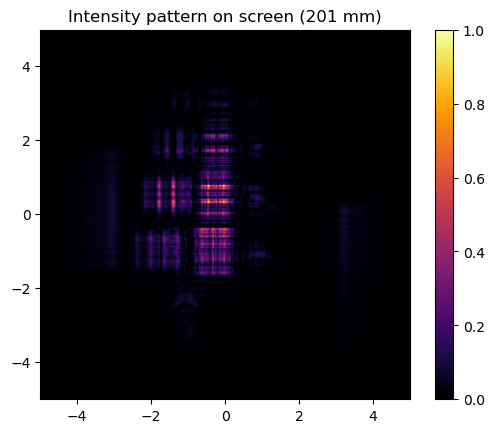

Progres: 0.7142857142857143 %


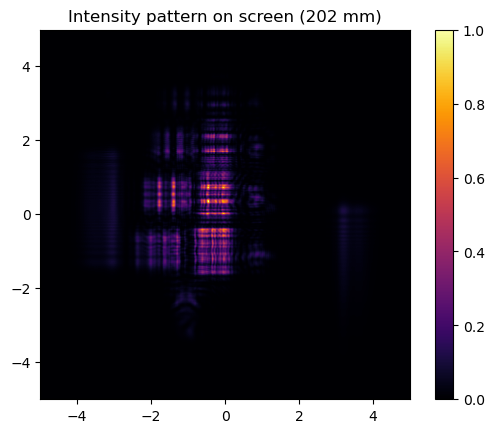

Progres: 1.4285714285714286 %


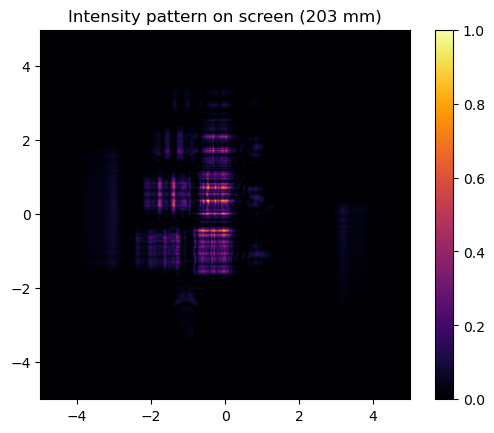

Progres: 2.142857142857143 %


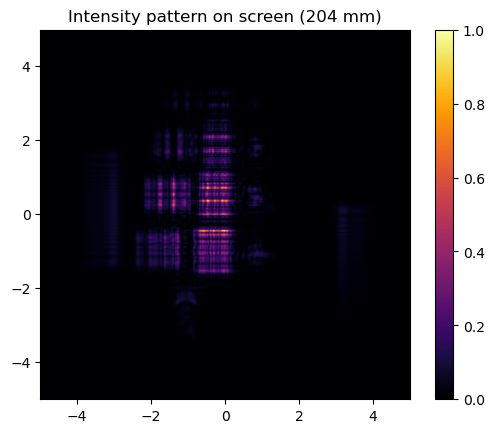

Progres: 2.857142857142857 %


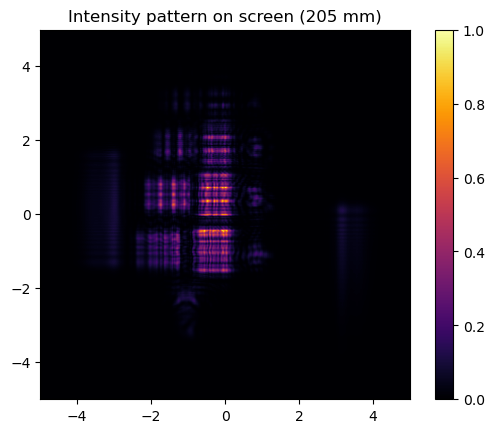

Progres: 3.5714285714285716 %


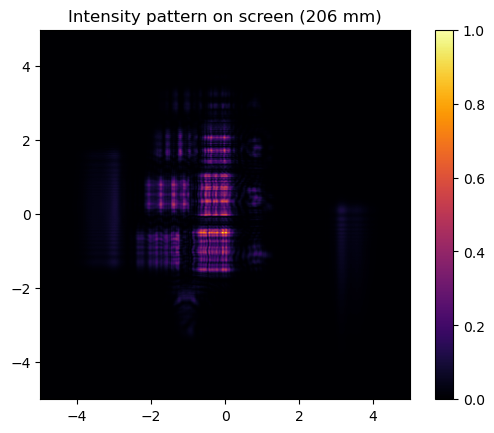

Progres: 4.285714285714286 %


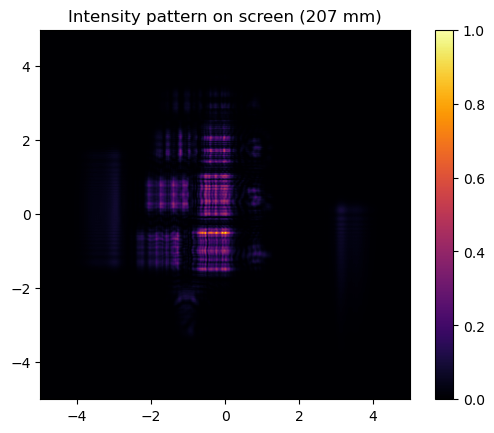

Progres: 5.0 %


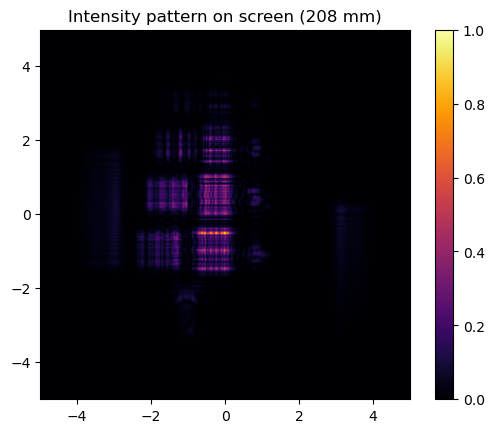

Progres: 5.714285714285714 %


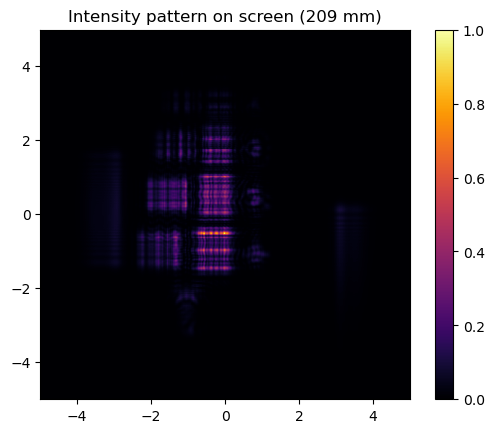

Progres: 6.428571428571429 %


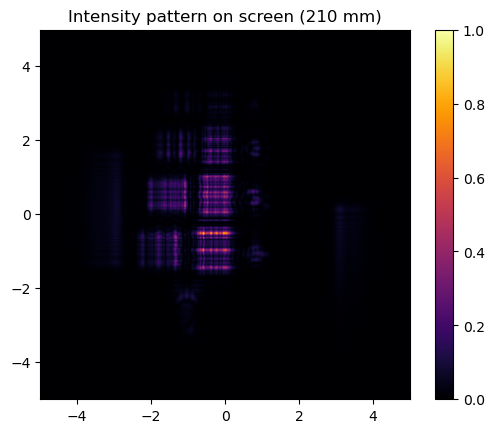

Progres: 7.142857142857143 %


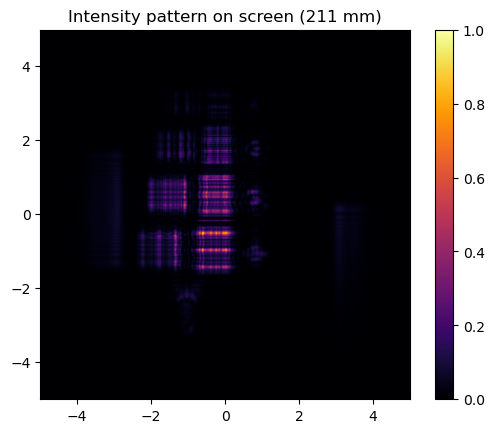

Progres: 7.857142857142857 %


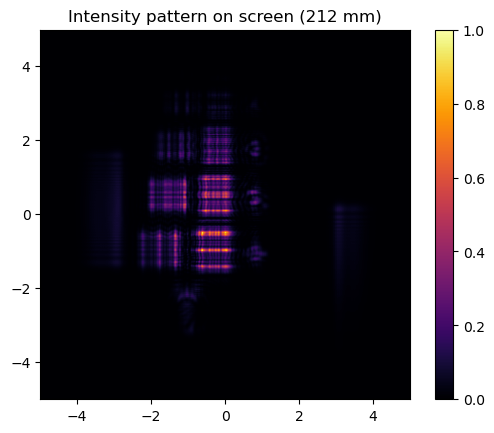

Progres: 8.571428571428571 %


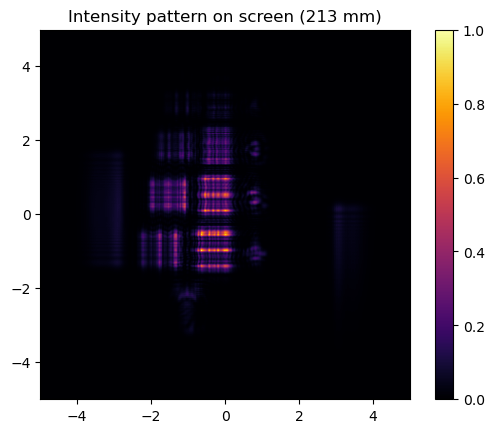

Progres: 9.285714285714286 %


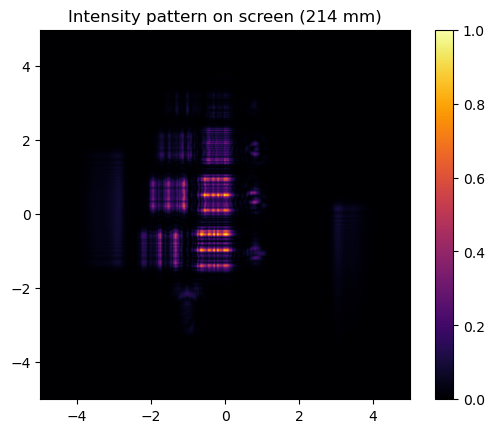

Progres: 10.0 %


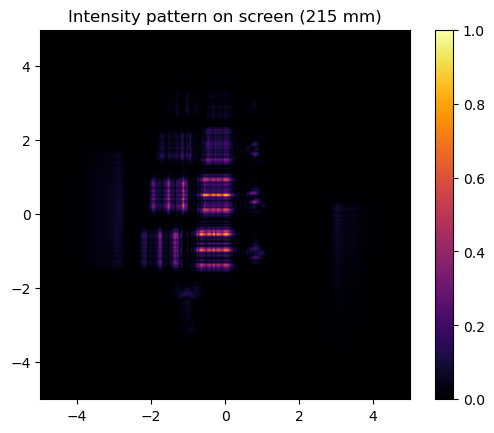

Progres: 10.714285714285714 %


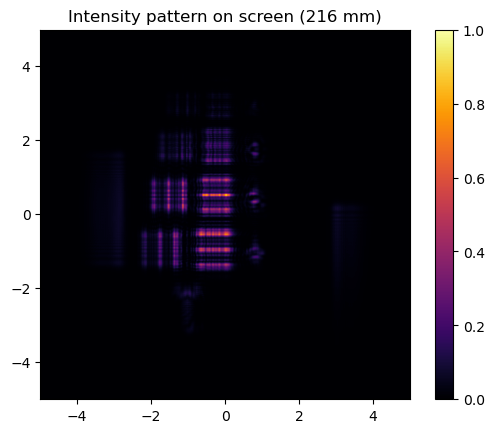

Progres: 11.428571428571429 %


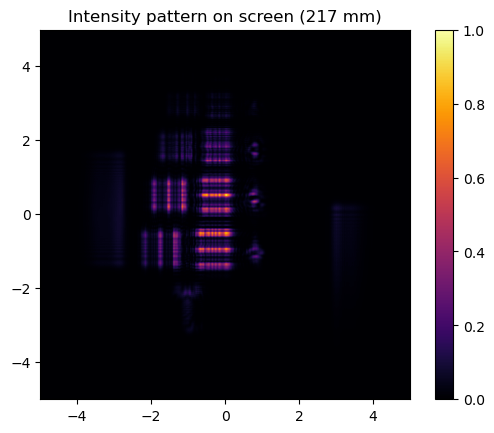

Progres: 12.142857142857142 %


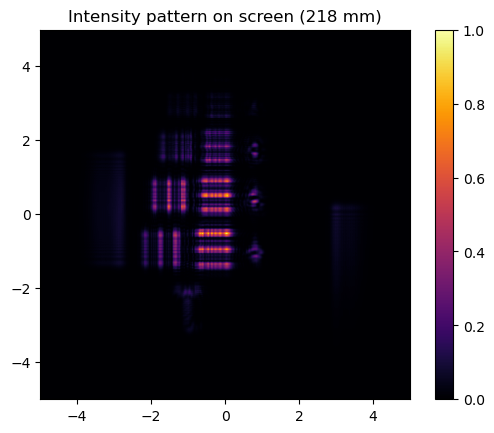

Progres: 12.857142857142858 %


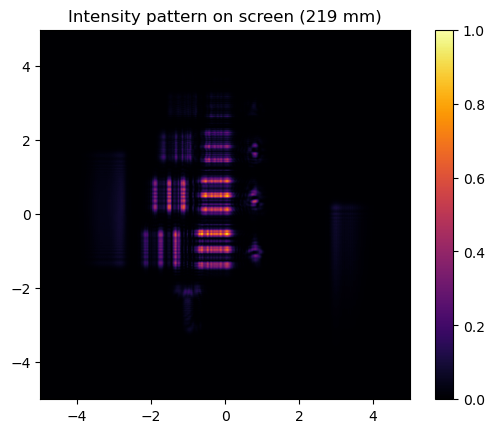

Progres: 13.571428571428571 %


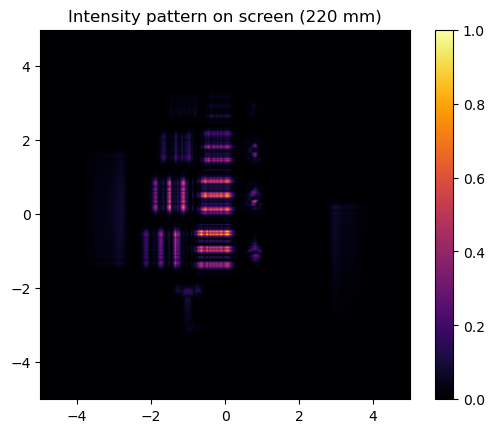

Progres: 14.285714285714286 %


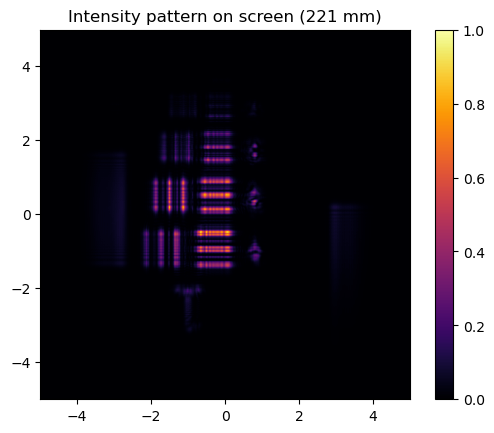

Progres: 15.0 %


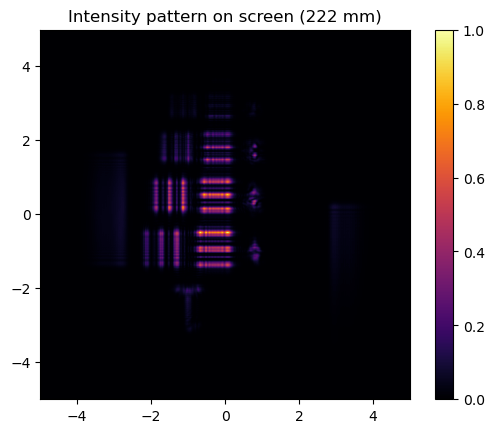

Progres: 15.714285714285714 %


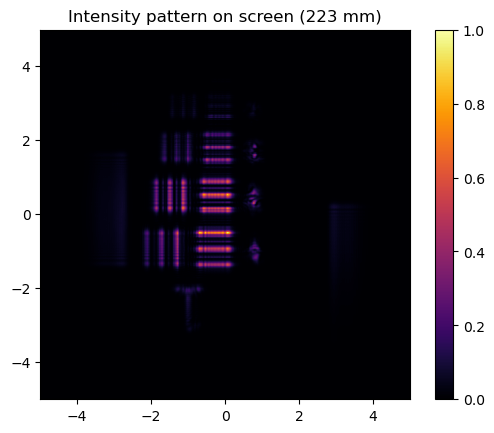

Progres: 16.428571428571427 %


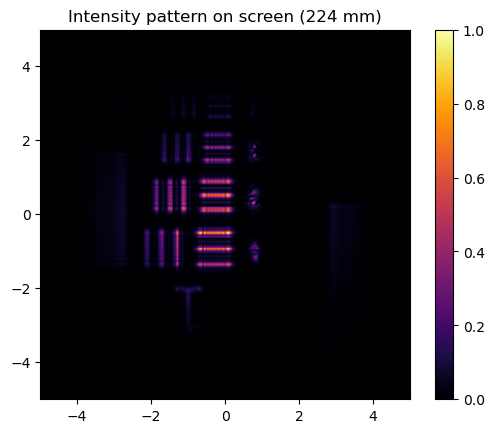

Progres: 17.142857142857142 %


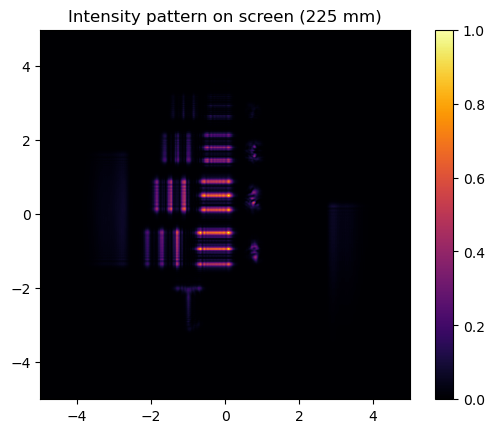

Progres: 17.857142857142858 %


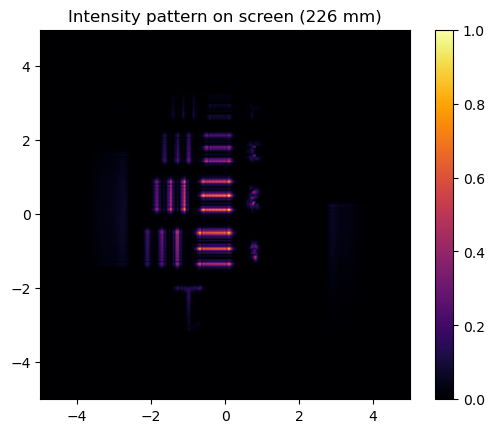

Progres: 18.571428571428573 %


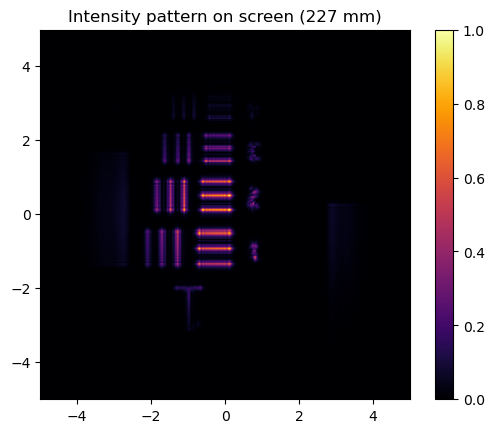

Progres: 19.285714285714285 %


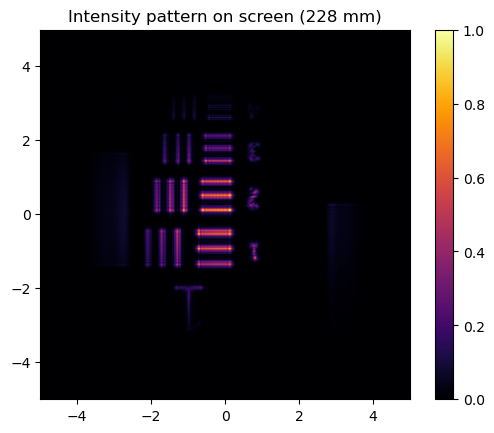

Progres: 20.0 %


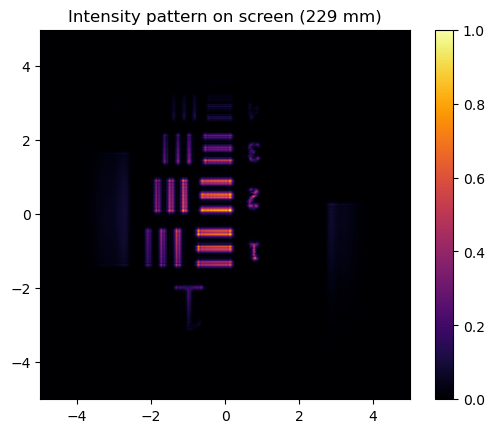

Progres: 20.714285714285715 %


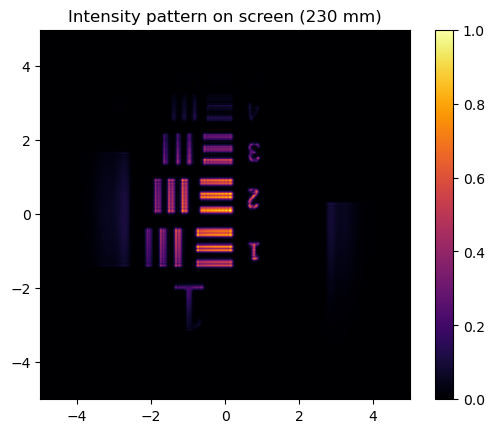

Progres: 21.428571428571427 %


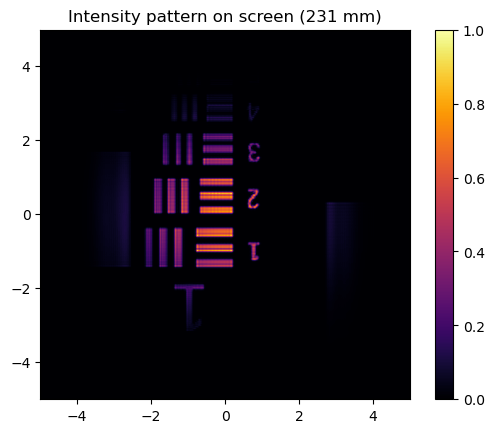

Progres: 22.142857142857142 %


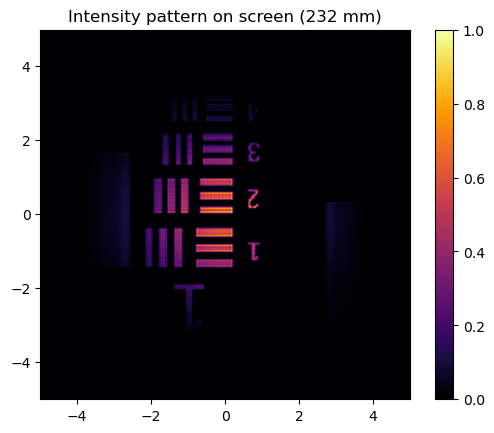

Progres: 22.857142857142858 %


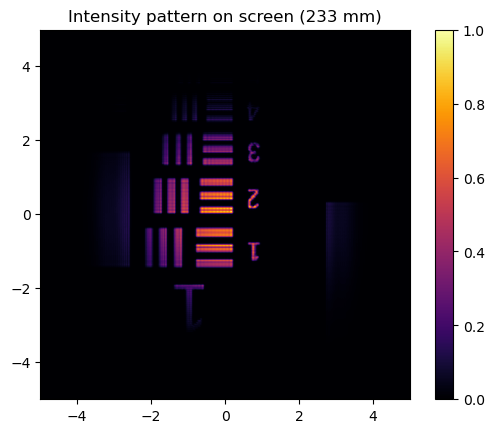

Progres: 23.571428571428573 %


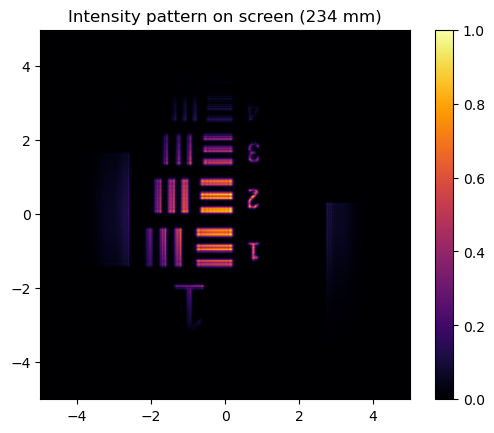

Progres: 24.285714285714285 %


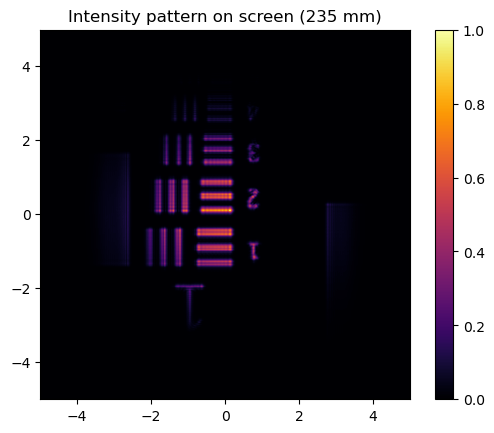

Progres: 25.0 %


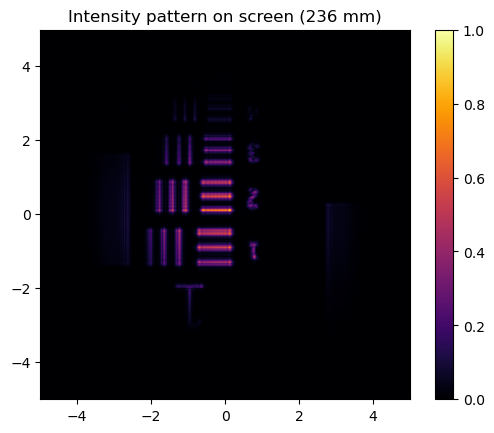

Progres: 25.714285714285715 %


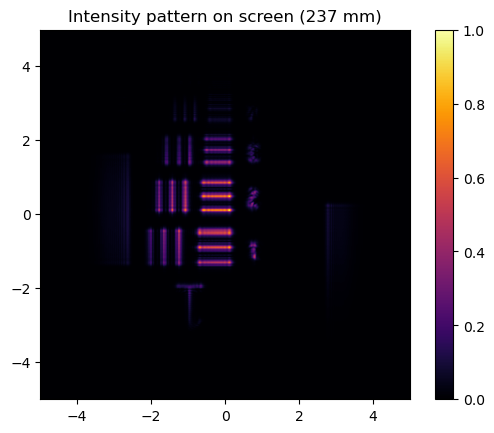

Progres: 26.428571428571427 %


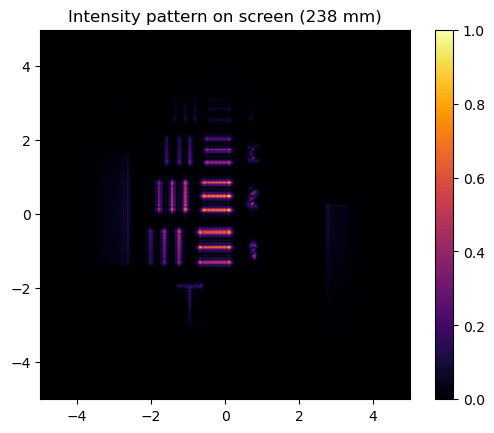

Progres: 27.142857142857142 %


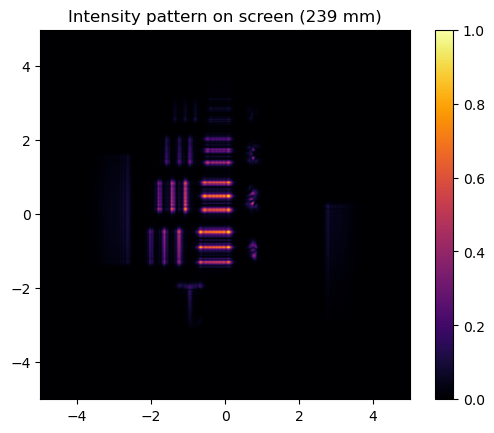

Progres: 27.857142857142858 %


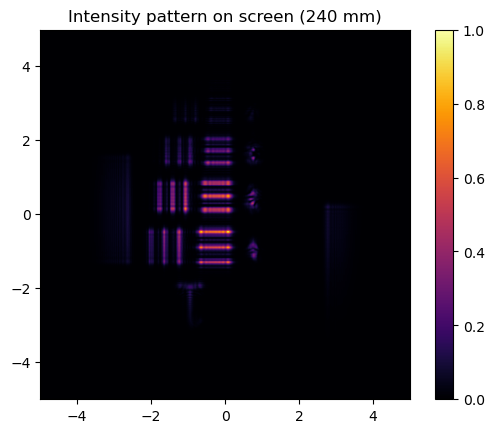

Progres: 28.571428571428573 %


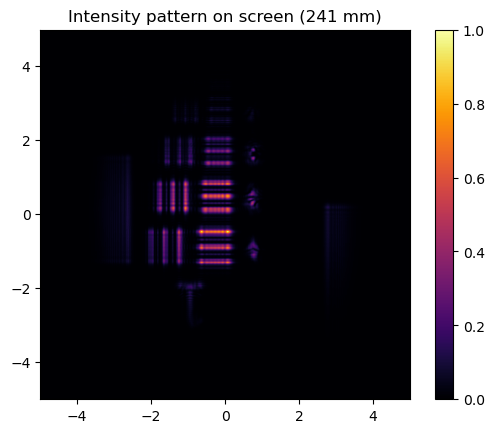

Progres: 29.285714285714285 %


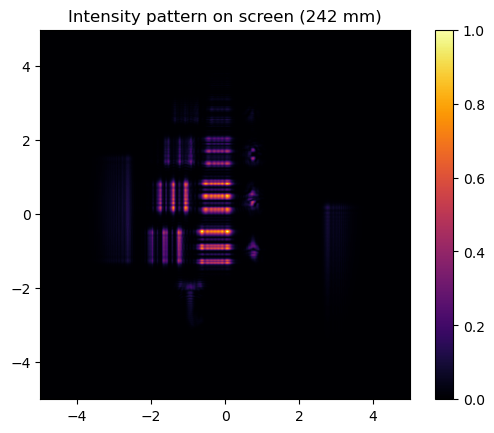

Progres: 30.0 %


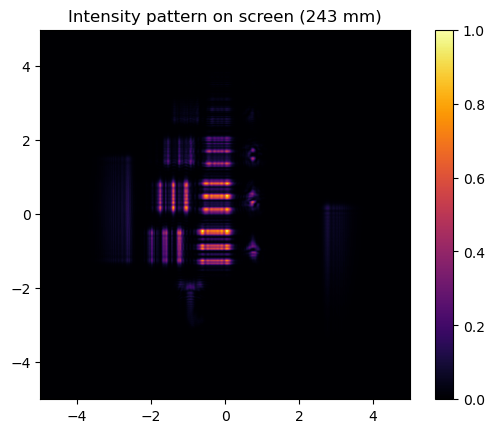

Progres: 30.714285714285715 %


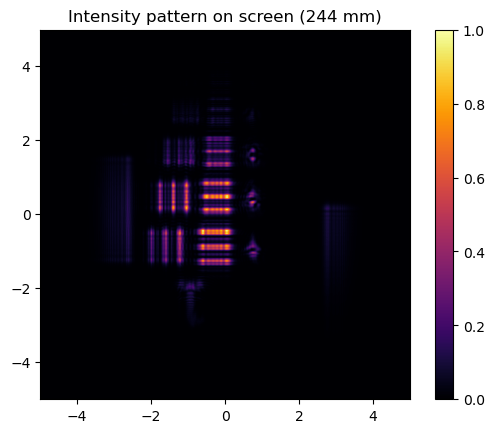

Progres: 31.428571428571427 %


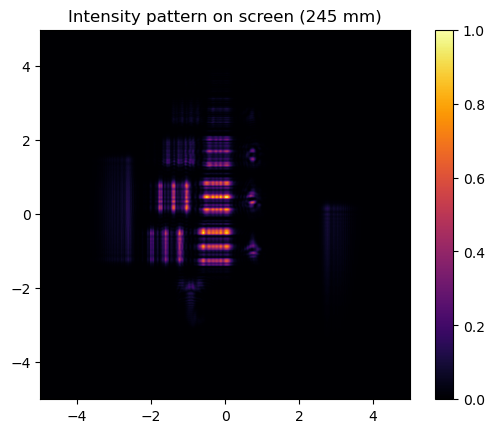

Progres: 32.142857142857146 %


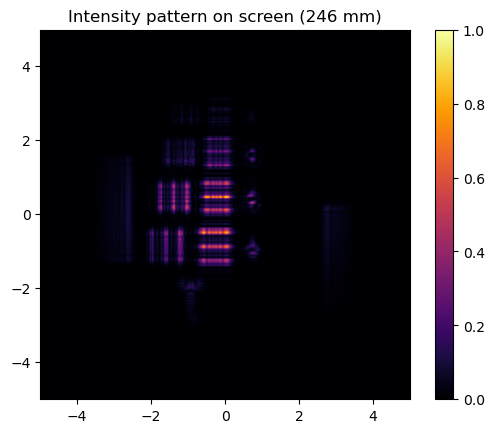

Progres: 32.857142857142854 %


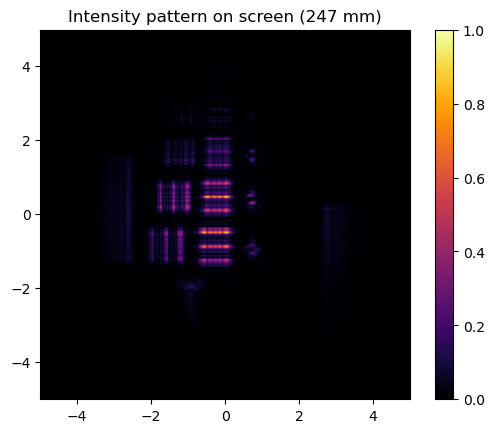

Progres: 33.57142857142857 %


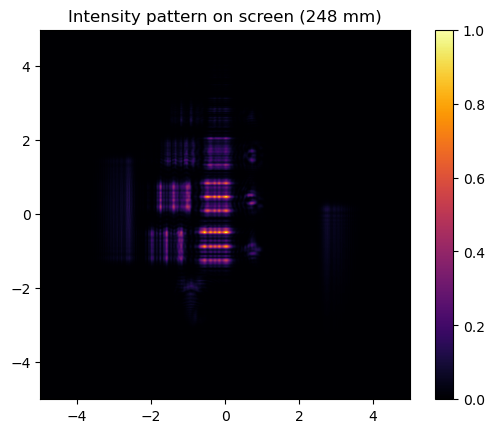

Progres: 34.285714285714285 %


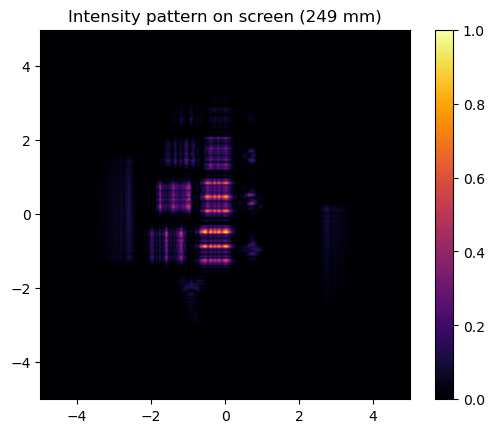

Progres: 35.0 %


In [ ]:
gif_image = []
for i in range(0,50):
    field.propagate(1 * mm)
    intensity = field.get_intensity()
    intensity = intensity[256:768,256:768]
    intensity /= np.max(intensity)
    # field.plot_intensity(intensity)
    plt.imshow(intensity,extent=(x.min()/mm, x.max()/mm, y.min()/mm, y.max()/mm),cmap="inferno")
    plt.colorbar()
    plt.title(f"Intensity pattern on screen ({1*i+200} mm)")
    if(savegif==True):
        filename = 'diffraction_pattern.png'
        plt.savefig(filename)
        gif_image.append(imageio.imread(filename))
    plt.show()
    
    print(f"Progres: {i*100/49} %")
    

# Create GIF from images
if savegif==True:
    imageio.mimsave('D:\\USAF_imaging.gif', gif_image, duration=0.4)

In [72]:
__del_vars__ = []
# Print all variable names in the current local scope
print("Deleted Variables:")
for __var__ in dir():
    if not __var__.startswith("_") and not callable(locals()[__var__]) and not isinstance(locals()[__var__], types.ModuleType):
        __del_vars__.append(__var__)
        exec("del "+ __var__)
    del __var__
    
print(__del_vars__)

Deleted Variables:
['USAF', 'a', 'aperture', 'beam_waist', 'cm', 'field', 'filename', 'focal_length_1', 'focal_length_2', 'gif_image', 'i', 'intensity', 'lens1', 'lens2', 'mm', 'nm', 'savegif', 'um', 'usaf', 'wavelength', 'x', 'x_shift', 'y', 'y_shift']
